# Final Assignment - Machine Learning

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
sns.set(rc={'figure.figsize':(15, 9)})
sns.set(font_scale=1.5)

The `world_happiness.csv` dataset from the `data` folder contains a series of variables that can be used as a proxy to a country's evaluation of its own goodness of life. The `happiness_score` metric tries to summarise how "happy" each country is. Load and save the dataset to a DataFrame object named `happy`. As always, familiarise yourself with its contents.

1. Using a histogram, plot the distribution of the `happiness_score` variable, **which distribution does it resemble?** (in the answer sheet write the [name of the distribution](https://miro.medium.com/max/962/1*DmPUIjvecL7KllOamoFSDw.png) that best fits the data)

In [13]:
# Load the data into a pd Dataframe named 'happy'
happy = pd.read_csv('C:\\Users\\Manuel\\Downloads\\Data Analytics\\x. Final Assignment\\data\\world_happiness.csv')
happy.sample(5)

,country,social_support,freedom,corruption,generosity,gdp_per_cap,life_exp,happiness_score
112,Bangladesh,126.0,27.0,36.0,107.0,4140,73.7,31
138,Rwanda,144.0,21.0,2.0,90.0,2110,69.1,4
106,Georgia,147.0,104.0,28.0,153.0,10700,73.2,37
80,Morocco,139.0,76.0,84.0,154.0,7770,74.4,67
43,Argentina,46.0,54.0,109.0,123.0,17500,77.0,109


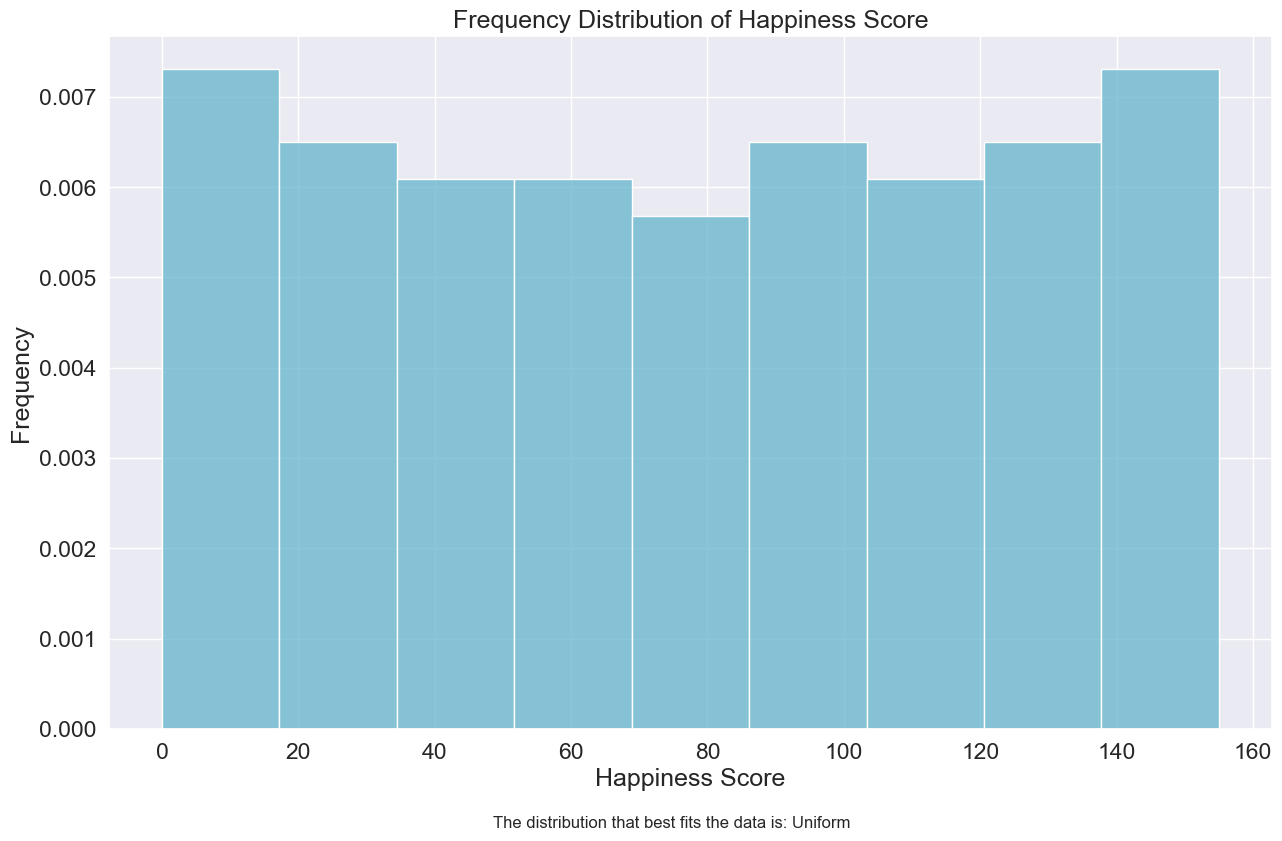

In [24]:
# Visualize 'happiness_score' distrivution with seaborn
sns.histplot(data = happy, x = 'happiness_score', stat = 'density', color = 'c')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Happiness Score')
plt.figtext(0.5, 0, "The distribution that best fits the data is: Uniform", ha = "center", fontsize = 12)
plt.show()



2. Plot a correlation matrix (or a correlation heatmap) between all the numeric variables in the dataset. **Which variable is the least correlated with the `happiness_score` metric?**

<Axes: >

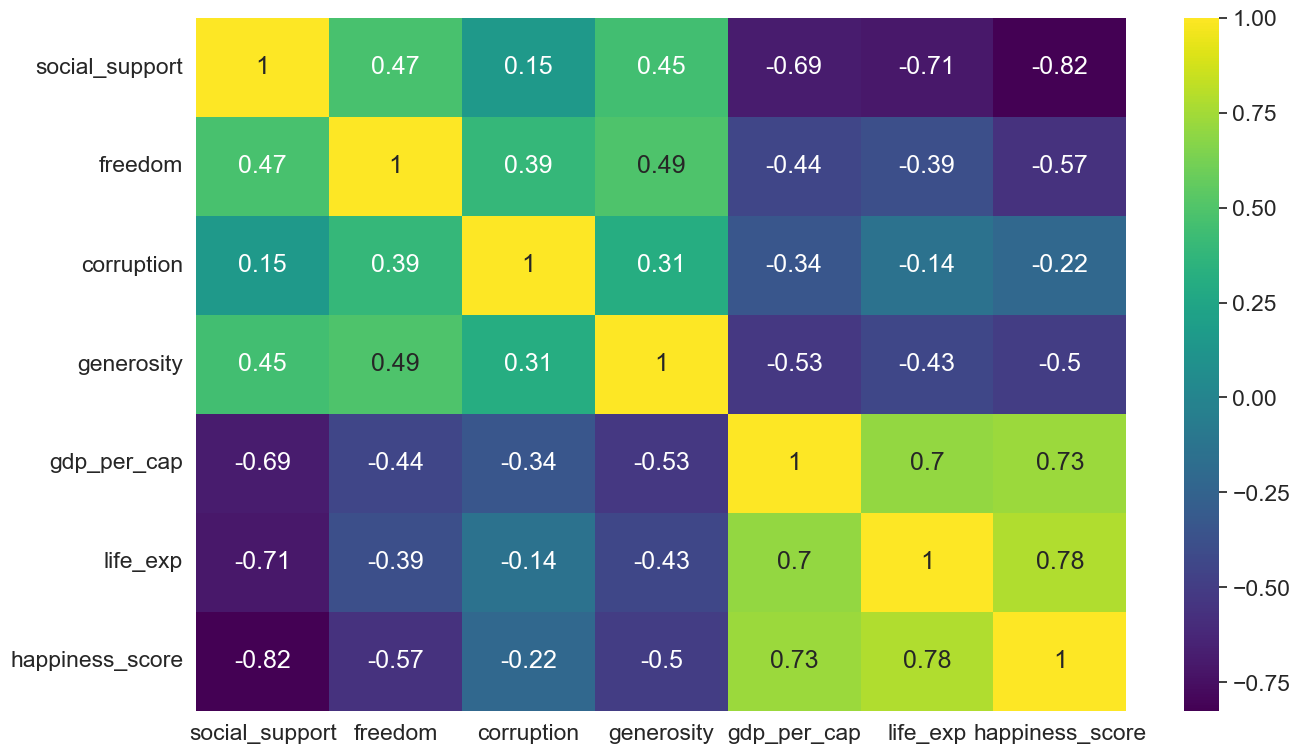

In [ ]:
# Remove the column 'country', which is not numeric
happy_c = happy.drop(columns = ['country'])
# Plot the correlation matrix as a heatmap using seaborn
sns.heatmap(happy_c.corr(), annot = True, cmap = 'viridis')

In [49]:
least = abs(happy_c.corr()['happiness_score']).sort_values(ascending = True)
print(f"The least correlated variable to the 'happiness_score' is → {least.index[0]}: {least.iloc[0]:.3f}")

The least correlated variable to the 'happiness_score' is → corruption: 0.215


3. You may have noticed that the `corruption` metric has some missing values. **How many countries have a missing corruption value?** After you've answered the question, replace all missing values *in all columns of the DataFrame* with the *respective column's mean value*.

In [51]:
happy.corruption.isna()

0      False
1      False
2      False
3      False
4      False
       ...  
138    False
139    False
140    False
141    False
142    False
Name: corruption, Length: 143, dtype: bool

4. Use the `statsmodel` package to create a linear regression model where you use `life_exp` to predict the `happiness_score`. After [refreshing your memory on how to interpret a regression coefficient](https://statisticsbyjim.com/regression/interpret-coefficients-p-values-regression/#:~:text=The%20coefficient%20value%20signifies%20how,in%20isolation%20from%20the%20others.), answer the following question: given the model you just created, **a 1-year increase in life expectancy corresponds to an increase of how many points of the happiness score variable?**.

5. Split the dataset in `train` and `test` sets, leaving 33% of the data in the latter. Then, using the `sklearn` package, train a linear regression model where you try to predict the `happiness_score` using the following set of predictors: `['social_support', 'freedom', 'generosity', 'life_exp']` *(use a `random_state=42`)*. Calculate the R-squared on the train set and compare it with the R-squared based on the test set. **Would you say that the model is overfitting the training data?** Motivate your answer.

6. Using the same model from the previous question, **calculate the MAE on the testing set and report it on the answers Sheet.** Are you satisfyied with the model's performance?

### Bonus

11. <span style="color:red">[BONUS]</span> **Do you notice anything strange when looking at the regression coefficients of the model in the previous answer?**